# 豆瓣影评分析实战

## 分词

### 加载数据和导入依赖库

In [1]:
import jieba #结巴分词
import pandas as pd #pandas库,处理数据岂能不用,简直完美取代Excel

basic_information = pd.read_csv('/Users/meininghang/Downloads/douban_movie/basic_information.csv') #读取基本信息文件
basic_information.head(10) #显示前十项

,影片名,姓名,演职人员,代表作,评分,性别,星座,出生日期,出生地,职业
0,变形金刚3 Transformers: Dark of the Moon,迈克尔·贝,导演,变形金刚,8.1,男,水瓶座,1965-02-17,"美国,加利福尼亚,洛杉矶",制片 / 导演 / 演员
1,变形金刚3 Transformers: Dark of the Moon,迈克尔·贝,导演,变形金刚2,7.6,男,水瓶座,1965-02-17,"美国,加利福尼亚,洛杉矶",制片 / 导演 / 演员
2,变形金刚3 Transformers: Dark of the Moon,迈克尔·贝,导演,变形金刚3,7.0,男,水瓶座,1965-02-17,"美国,加利福尼亚,洛杉矶",制片 / 导演 / 演员
3,变形金刚3 Transformers: Dark of the Moon,希亚·拉博夫,演员,变形金刚,8.1,男,双子座,1986-06-11,"美国,加利福尼亚州,洛杉矶",演员 / 导演 / 编剧 / 配音
4,变形金刚3 Transformers: Dark of the Moon,迈克尔·贝,导演,变形金刚,8.1,男,水瓶座,1965-02-17,"美国,加利福尼亚,洛杉矶",制片 / 导演 / 演员
5,变形金刚3 Transformers: Dark of the Moon,迈克尔·贝,导演,变形金刚2,7.6,男,水瓶座,1965-02-17,"美国,加利福尼亚,洛杉矶",制片 / 导演 / 演员
6,变形金刚3 Transformers: Dark of the Moon,迈克尔·贝,导演,变形金刚3,7.0,男,水瓶座,1965-02-17,"美国,加利福尼亚,洛杉矶",制片 / 导演 / 演员
7,变形金刚3 Transformers: Dark of the Moon,希亚·拉博夫,演员,变形金刚,8.1,男,双子座,1986-06-11,"美国,加利福尼亚州,洛杉矶",演员 / 导演 / 编剧 / 配音
8,变形金刚3 Transformers: Dark of the Moon,希亚·拉博夫,演员,变形金刚2,7.6,男,双子座,1986-06-11,"美国,加利福尼亚州,洛杉矶",演员 / 导演 / 编剧 / 配音
9,变形金刚3 Transformers: Dark of the Moon,希亚·拉博夫,演员,变形金刚3,7.0,男,双子座,1986-06-11,"美国,加利福尼亚州,洛杉矶",演员 / 导演 / 编剧 / 配音


In [2]:
movie_basic_information = pd.read_csv('/Users/meininghang/Downloads/douban_movie/movie_basic_information.csv') #另一份基本信息文件
movie_basic_information.head(10) #显示前十项

,主演,5星,制片国家/地区,编剧,4星,类型,豆瓣评分,3星,上映日期,1星,2星,电影名称,片长
0,刘烨/冯远征/张嘉译/陈坤/马少骅/李沁/周润发/赵本山/黄磊/吕良伟/刘德华/廖凡/董洁/...,NaN,中国大陆 / 香港,董哲/郭俊立/黄建新,NaN,剧情/历史,NaN,NaN,2011-06-15,NaN,NaN,建党伟业,124分钟
1,希亚·拉博夫/罗茜·汉丁顿-惠特莉/乔什·杜哈明/泰瑞斯·吉布森/约翰·马尔科维奇/弗兰西斯...,12.8%,美国,伊伦·克鲁格,36.9%,动作/科幻,7.0,41.1%,2011-07-21,1.7%,7.5%,变形金刚3 Transformers: Dark of the Moon,154分钟
2,杰克·布莱克/安吉丽娜·朱莉/达斯汀·霍夫曼/加里·奥德曼/成龙/塞斯·罗根/刘玉玲/大卫·...,26.7%,美国,乔纳森·阿贝尔/格伦·伯杰,48.3%,喜剧/动作/动画/冒险,8.0,23.0%,2011-05-28,0.3%,1.7%,功夫熊猫2 Kung Fu Panda 2,91分钟
3,克里斯蒂安·贝尔/倪妮/张歆怡/黄天元/韩熙庭/张逗逗/佟大为/曹可凡/渡部笃郎/黄海波/窦...,29.0%,中国大陆 / 香港,刘恒/严歌苓,45.8%,剧情/历史/战争,8.0,21.1%,2011-12-15,1.2%,2.9%,金陵十三钗,145分钟
4,李连杰/周迅/陈坤/李宇春/桂纶镁/范晓萱/樊少皇/杜奕衡/刘家辉/张馨予/盛鉴/薛剑/王双...,9.0%,中国大陆 / 香港,徐克/何冀平/朱雅欐,31.7%,动作/武侠/古装,6.7,46.3%,2011-12-15,2.4%,10.6%,龙门飞甲,120分钟
5,约翰尼·德普/佩内洛普·克鲁兹/杰弗里·拉什/伊恩·麦柯肖恩/山姆·克拉弗林/阿斯特丽德·伯...,17.2%,美国,泰德·艾略特/特里·鲁西奥,44.1%,动作/奇幻/冒险,7.5,34.5%,2011-05-20,0.5%,3.7%,加勒比海盗4：惊涛怪浪 Pirates of the Caribbean: On Stran...,136分钟
6,丹尼尔·雷德克里夫/艾玛·沃森/鲁伯特·格林特/海伦娜·伯翰·卡特/拉尔夫·费因斯/艾伦·瑞...,49.0%,美国 / 英国,史蒂夫·克洛夫斯/J·K·罗琳,36.1%,剧情/悬疑/奇幻/冒险,8.6,13.6%,2011-08-04,0.4%,1.1%,哈利·波特与死亡圣器(下) Harry Potter and the Deathly Hal...,130分钟
7,白百何/文章/张嘉译/王耀庆/张子萱/郭京飞/曹翠芬/魏宗万/海清/廖凡/徐梵溪/李念/焦俊...,15.0%,中国大陆,鲍鲸鲸,42.1%,剧情/爱情,7.3,37.0%,2011-11-08,1.1%,4.9%,失恋33天,110分钟
8,尼尔·帕特里克·哈里斯/杰玛·梅斯/汉克·阿扎利亚/乔纳森·温特斯/凯蒂·派瑞/艾伦·卡明/...,14.9%,美国 / 比利时,J·大卫·斯提姆/戴维·N·韦斯/佩约/杰·舒瑞克/大卫·隆恩,39.2%,喜剧/动画/家庭/奇幻,7.2,38.8%,2011-08-10,1.1%,6.1%,蓝精灵 The Smurfs,103分钟
9,范·迪塞尔/保罗·沃克/道恩·强森/乔丹娜·布鲁斯特/泰瑞斯·吉布森/卢达克里斯/马特·斯查...,38.4%,美国,克里斯·摩根/盖瑞·斯科特·汤普森,44.8%,动作/犯罪,8.4,15.3%,2011-05-12,0.3%,1.2%,速度与激情5 Fast Five,130分钟


In [3]:
comment_information = pd.read_csv('/Users/meininghang/Downloads/douban_movie/comments.csv') #加载影评信息
comment_information.head(10) #显示前十项

,电影名称,评论人,星级,评论时间,题目,评论内容,有用,没用,回应,地理位置
0,变形金刚3的影评 (1590),漫科,1,2011-07-08 02:11:09,麦克贝你丫给我站住！ 3d眼镜柄狂插你眼！,这篇影评可能有剧透 很多人怕，说你不要写变3影...,2568.0,279.0,563回应,SNOWMAN
1,变形金刚3的影评 (1590),李胶囊,1,2011-07-08 02:11:09,迈克尔贝你这是作死啊,这篇影评可能有剧透 本戏的主要剧情进展表 开...,1651.0,150.0,483回应,"Firenze, Italy"
2,变形金刚3的影评 (1590),狒狒,1,2011-07-08 02:11:09,记念变形金刚3,真的猛士，敢于直面惨淡的人生，敢于正视推迟的档期。这是怎样的哀痛者和幸福者？然而上映又常常为...,566.0,142.0,120回应,江西南昌
3,变形金刚3的影评 (1590),KILL88,1,2011-07-08 02:11:09,看完变3来详细介绍出场的所有金刚，剧透了小心,买拷贝说，世界上有300个专家，上亿的粉丝，我拍这个电影是给粉丝看的，不是给那300个人看的...,292.0,25.0,57回应,NaN
4,变形金刚3的影评 (1590),木遥,1,2011-07-08 02:11:09,关于《变形金刚3》的几句话,1. 没有理由不看 3D IMAX 版。 2. 前半部分基本上可以看做是 Lenov...,329.0,74.0,151回应,"New York City, United States"
5,变形金刚3的影评 (1590),魏知超,1,2011-07-08 02:11:09,《变形金刚3》吐槽：认真不一定会赢，但不认真一定输,废话不说，直接开始吐槽。 汽车人一登场，就是帮着美国人清除“危险势力”。虽然我很讨厌“...,116.0,18.0,60回应,浙江宁波
6,变形金刚3的影评 (1590),Cedonulli,1,2011-07-08 02:11:09,坑爹的广告片 坑爹的中国奶 极少量剧透,片子很好看 劲爆剧情和一般剧情穿插 整部片子我的肾上腺激素都在不停的喷啊 妞不错 前凸后翘...,148.0,22.0,110回应,"Melbourne, Australia"
7,变形金刚3的影评 (1590),黄兔君,1,2011-07-08 02:11:09,不管是硅基还是碳基都是基（腐向吐槽注意,这篇影评可能有剧透 前段时间看友邻纷纷拿变3剧...,58.0,4.0,10回应,"London, United Kingdom"
8,变形金刚3的影评 (1590),[已注销],1,2011-07-08 02:11:09,伤感的电影,上个月最后一天朋友介绍认识了一个女孩，我看她第一眼感觉挺好，她长的不错，人也挺随和的，我挺喜...,65.0,15.0,51回应,已注销
9,变形金刚3的影评 (1590),陈朝,1,2011-07-08 02:11:09,“针对霸天虎的战略，我谈几点看法”,一般的吐槽就略过了，我最惊讶的是霸天虎居然输了，稍作回想，就能发现他们的一系列愚蠢的失误。针...,34.0,5.0,5回应,北京


### 清洗数据

In [4]:
basic_information.影片名.unique() #查看影片数量

array(['变形金刚3 Transformers: Dark of the Moon', '最强囍事', '关云长', '鸿门宴传奇',
       '喜羊羊与灰太狼之兔年顶呱呱', '铁甲钢拳 Real Steel', '致命伴旅 The Tourist',
       '变形金刚4：绝迹重生 Transformers: Age of Extinction', '心花路放', '西游记之大闹天宫',
       '智取威虎山', 'X战警：逆转未来 X-Men: Days of Future Past',
       '美国队长2 Captain America: The Winter Soldier',
       '猩球崛起2：黎明之战 Dawn of the Planet of the Apes', '爸爸去哪儿', '分手大师',
       '后会无期', '匆匆那年', '银河护卫队 Guardians of the Galaxy',
       '超凡蜘蛛侠2 The Amazing Spider-Man 2', '澳门风云 賭城風雲', '小时代3：刺金时代',
       '哥斯拉 Godzilla', '霍比特人2：史矛革之战 The Hobbit: The Desolation of Smaug',
       '敢死队3 The Expendables 3', '同桌的妳',
       '驯龙高手2 How to Train Your Dragon 2', '极品飞车 Need for Speed',
       '明日边缘 Edge of Tomorrow', '速度与激情7 Furious 7', '寻龙诀', '港囧',
       '复仇者联盟2：奥创纪元 Avengers: Age of Ultron', '夏洛特烦恼',
       '侏罗纪世界 Jurassic World', '煎饼侠', '澳门风云2 賭城風雲II', '西游记之大圣归来', '老炮儿',
       '碟中谍5：神秘国度 Mission: Impossible - Rogue Nation', '唐人街探案',
       '霍比特人3：五军之战 The Hobbit: The Battle of the Five A

In [5]:
basic_information.影片名.value_counts() #查看各影片具体数量

星球大战7：原力觉醒 Star Wars: The Force Awakens                 182
变形金刚4：绝迹重生 Transformers: Age of Extinction              175
功夫熊猫3 Kung Fu Panda 3                                   169
美国队长2 Captain America: The Winter Soldier               164
霍比特人3：五军之战 The Hobbit: The Battle of the Five Armies    163
银河护卫队 Guardians of the Galaxy                           160
蝙蝠侠大战超人：正义黎明 Batman v Superman: Dawn of Justice         158
疯狂动物城 Zootopia                                          157
X战警：逆转未来 X-Men: Days of Future Past                     157
霍比特人2：史矛革之战 The Hobbit: The Desolation of Smaug         155
复仇者联盟2：奥创纪元 Avengers: Age of Ultron                     150
美国队长3 Captain America: Civil War                        150
湄公河行动                                                   136
蚁人 Ant-Man                                              134
智取威虎山                                                   128
猩球崛起2：黎明之战 Dawn of the Planet of the Apes               126
天将雄师                                    

In [6]:
T_3 = basic_information.iloc[:40] #变3基本信息共有40行,往上面👆,最后一行,所以截取全部信息,注意0是第一个起始数字
#由于此时数据量很少,人工查看相关信息即可,我们实际上需要的信息只有演职人员/姓名两列,单独拿出来即可,其余信息随用随取

In [7]:
#重构信息
T_3_information = T_3[['姓名','演职人员']] #选取信息
T_3_information = T_3_information.drop_duplicates(['姓名']) #去重
T_3_information.index = [1,2,3,4,5,6,7,8,9,10,11,12] #重命名列
T_3_information #显示信息,此数据用于分析各演员在评论中的表现

,姓名,演职人员
1,迈克尔·贝,导演
2,希亚·拉博夫,演员
3,罗茜·汉丁顿-惠特莉,演员
4,乔什·杜哈明,演员
5,泰瑞斯·吉布森,演员
6,约翰·马尔科维奇,演员
7,弗兰西斯·麦克多蒙德,演员
8,郑肯,演员
9,凯文·杜恩,演员
10,朱丽叶·怀特,演员


In [8]:
movie_basic_information.电影名称.unique() #对另一份信息数据进行查验,并找到变3的信息

array(['建党伟业', '变形金刚3 Transformers: Dark of the Moon',
       '功夫熊猫2 Kung Fu Panda 2', '金陵十三钗', '龙门飞甲',
       '加勒比海盗4：惊涛怪浪 Pirates of the Caribbean: On Stranger Tides',
       '哈利·波特与死亡圣器(下) Harry Potter and the Deathly Hallows: Part 2',
       '失恋33天', '蓝精灵 The Smurfs', '速度与激情5 Fast Five',
       '洛杉矶之战 Battle: Los Angeles', '窃听风云2', '新少林寺', '白蛇传说',
       '猩球崛起 Rise of the Planet of the Apes', '将爱情进行到底', '武林外传', '画壁',
       '武侠', '最强囍事', '关云长', '鸿门宴传奇', '喜羊羊与灰太狼之兔年顶呱呱', '铁甲钢拳 Real Steel',
       '致命伴旅 The Tourist', '变形金刚4：绝迹重生 Transformers: Age of Extinction',
       '心花路放', '西游记之大闹天宫', '智取威虎山', '星际穿越 Interstellar',
       'X战警：逆转未来 X-Men: Days of Future Past',
       '美国队长2 Captain America: The Winter Soldier',
       '猩球崛起2：黎明之战 Dawn of the Planet of the Apes', '爸爸去哪儿', '分手大师',
       '后会无期', '匆匆那年', '银河护卫队 Guardians of the Galaxy',
       '超凡蜘蛛侠2 The Amazing Spider-Man 2', '澳门风云 賭城風雲', '一步之遥',
       '小时代3：刺金时代', '哥斯拉 Godzilla',
       '霍比特人2：史矛革之战 The Hobbit: The Desolation of 

In [9]:
T_3_Star = movie_basic_information[movie_basic_information.电影名称 == '变形金刚3 Transformers: Dark of the Moon'] #设定筛选标准
T_3_Star = T_3_Star.T#评分信息比较特殊,每部电影只有一个信息

T_3_Star

,1
主演,希亚·拉博夫/罗茜·汉丁顿-惠特莉/乔什·杜哈明/泰瑞斯·吉布森/约翰·马尔科维奇/弗兰西斯...
5星,12.8%
制片国家/地区,美国
编剧,伊伦·克鲁格
4星,36.9%
类型,动作/科幻
豆瓣评分,7
3星,41.1%
上映日期,2011-07-21
1星,1.7%


In [10]:
#汇总基本信息
T_3_INF = pd.read_csv('/Users/meininghang/Downloads/douban_movie/T_3_information.csv')
T_3_INF

,电影名称,变3
0,导演,迈克尔·贝
1,演员1,希亚·拉博夫
2,演员2,罗茜·汉丁顿-惠特莉
3,演员3,乔什·杜哈明
4,演员4,泰瑞斯·吉布森
5,演员5,约翰·马尔科维奇
6,演员6,弗兰西斯·麦克多蒙德
7,演员7,郑肯
8,演员8,凯文·杜恩
9,演员9,朱丽叶·怀特


In [11]:
T_3_comment = comment_information[comment_information.电影名称 == '变形金刚3的影评 (1590)'] #筛选影评信息
T_3_comment.head() #查看前五项

,电影名称,评论人,星级,评论时间,题目,评论内容,有用,没用,回应,地理位置
0,变形金刚3的影评 (1590),漫科,1,2011-07-08 02:11:09,麦克贝你丫给我站住！ 3d眼镜柄狂插你眼！,这篇影评可能有剧透 很多人怕，说你不要写变3影...,2568.0,279.0,563回应,SNOWMAN
1,变形金刚3的影评 (1590),李胶囊,1,2011-07-08 02:11:09,迈克尔贝你这是作死啊,这篇影评可能有剧透 本戏的主要剧情进展表 开...,1651.0,150.0,483回应,"Firenze, Italy"
2,变形金刚3的影评 (1590),狒狒,1,2011-07-08 02:11:09,记念变形金刚3,真的猛士，敢于直面惨淡的人生，敢于正视推迟的档期。这是怎样的哀痛者和幸福者？然而上映又常常为...,566.0,142.0,120回应,江西南昌
3,变形金刚3的影评 (1590),KILL88,1,2011-07-08 02:11:09,看完变3来详细介绍出场的所有金刚，剧透了小心,买拷贝说，世界上有300个专家，上亿的粉丝，我拍这个电影是给粉丝看的，不是给那300个人看的...,292.0,25.0,57回应,NaN
4,变形金刚3的影评 (1590),木遥,1,2011-07-08 02:11:09,关于《变形金刚3》的几句话,1. 没有理由不看 3D IMAX 版。 2. 前半部分基本上可以看做是 Lenov...,329.0,74.0,151回应,"New York City, United States"


In [12]:
T_3_comment.info() #查看基本信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 1569
Data columns (total 10 columns):
电影名称    1570 non-null object
评论人     1569 non-null object
星级      1570 non-null int64
评论时间    1570 non-null object
题目      1570 non-null object
评论内容    1570 non-null object
有用      319 non-null float64
没用      196 non-null float64
回应      1570 non-null object
地理位置    732 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 134.9+ KB


#### 开始分词

#####  过滤停用词

In [13]:
#加载停用词典,在此选用哈工大停用词典
with open('/Users/meininghang/Downloads/stopwords-master/哈工大停用词表.txt') as f:
    stop_words = f.read()

In [14]:
stop_words.splitlines() #祛除换行符

['———',
 '》），',
 '）÷（１－',
 '”，',
 '）、',
 '＝（',
 ':',
 '→',
 '℃ ',
 '&',
 '*',
 '一一',
 '~~~~',
 '’',
 '. ',
 '『',
 '.一',
 './',
 '-- ',
 '』',
 '＝″',
 '【',
 '［＊］',
 '｝＞',
 '［⑤］］',
 '［①Ｄ］',
 'ｃ］',
 'ｎｇ昉',
 '＊',
 '//',
 '［',
 '］',
 '［②ｅ］',
 '［②ｇ］',
 '＝｛',
 '}',
 '，也 ',
 '‘',
 'Ａ',
 '［①⑥］',
 '［②Ｂ］ ',
 '［①ａ］',
 '［④ａ］',
 '［①③］',
 '［③ｈ］',
 '③］',
 '１． ',
 '－－ ',
 '［②ｂ］',
 '’‘ ',
 '××× ',
 '［①⑧］',
 '０：２ ',
 '＝［',
 '［⑤ｂ］',
 '［②ｃ］ ',
 '［④ｂ］',
 '［②③］',
 '［③ａ］',
 '［④ｃ］',
 '［①⑤］',
 '［①⑦］',
 '［①ｇ］',
 '∈［ ',
 '［①⑨］',
 '［①④］',
 '［①ｃ］',
 '［②ｆ］',
 '［②⑧］',
 '［②①］',
 '［①Ｃ］',
 '［③ｃ］',
 '［③ｇ］',
 '［②⑤］',
 '［②②］',
 '一.',
 '［①ｈ］',
 '.数',
 '［］',
 '［①Ｂ］',
 '数/',
 '［①ｉ］',
 '［③ｅ］',
 '［①①］',
 '［④ｄ］',
 '［④ｅ］',
 '［③ｂ］',
 '［⑤ａ］',
 '［①Ａ］',
 '［②⑧］',
 '［②⑦］',
 '［①ｄ］',
 '［②ｊ］',
 '〕〔',
 '］［',
 '://',
 '′∈',
 '［②④',
 '［⑤ｅ］',
 '１２％',
 'ｂ］',
 '...',
 '...................',
 '…………………………………………………③',
 'ＺＸＦＩＴＬ',
 '［③Ｆ］',
 '」',
 '［①ｏ］',
 '］∧′＝［ ',
 '∪φ∈',
 '′｜',
 '｛－',
 '②ｃ',
 '｝',
 '［③①］',
 'Ｒ．Ｌ．',
 '［①Ｅ］',
 'Ψ',
 '－［＊］－',
 '↑',
 '

In [15]:
all_title_seg = [] #所有题目分词
for i in T_3_comment.题目:
    single_title_seg = [] #存放单个题目分词结果
    segs = jieba.cut(i) #对每个题目进行切分
    for seg in segs:
        if seg not in stop_words: #判断是否在停用词典内,
            single_title_seg.append(seg) #单个评论题目加入[]
    all_title_seg.append(single_title_seg) #全体加入
    

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/ds/3_3p7np96_sgk7lq6qlpcmhh0000gn/T/jieba.cache
Loading model cost 2.115 seconds.
Prefix dict has been built succesfully.


In [16]:
print('/'.join (all_title_seg[9])) #查验

针对/霸天虎/战略/我谈/几点/看法


In [17]:
#主角,所有评论,皆与上类似
all_comment_seg = [] 
for i in T_3_comment.评论内容:
    single_comment_seg = []
    segs = jieba.cut(i)
    for seg in segs:
        if seg not in stop_words:
            single_comment_seg.append(seg)
    all_comment_seg.append(single_comment_seg)

In [18]:
print('/'.join(all_comment_seg[388]))

变形金刚/整体实力/2/有所提高/最后/一段/红蜘蛛/枪射/瞎/威震/妞儿/游说/汽车/抱头/击毙/场面/实再/差强人意/机器人/拍得/太少/满意/没有/梅根/惊艳/香肠/嘴/满意/伊利/国内/名声/不怎么样/花/多钱/强奸/人眼/满意/想/大黄


## 情感分析

In [21]:
from snownlp import SnowNLP #加载snownlp

In [22]:
#test
s = SnowNLP(T_3_comment.题目[1])

In [23]:
s.words #词

['迈克尔贝', '你', '这', '是', '作', '死', '啊']

In [26]:
s.tags #词性标注

In [27]:
for i in s.tags:
    print(i)

('迈克尔贝', 'p')
('你', 'r')
('这', 'r')
('是', 'v')
('作', 'v')
('死', 'v')
('啊', 'y')


In [31]:
s.sentiments #情绪

0.20410726096518372

In [32]:
s.keywords(3) #关键词

['作', '死', '迈克尔贝']

In [37]:
s.summary(3)  #摘要,似乎没有效果,可能因为太短

['迈克尔贝你这是作死啊']

In [39]:
s.sentences #切句子

['迈克尔贝你这是作死啊']

In [42]:
s.tf #tf

[{'迈': 1},
 {'克': 1},
 {'尔': 1},
 {'贝': 1},
 {'你': 1},
 {'这': 1},
 {'是': 1},
 {'作': 1},
 {'死': 1},
 {'啊': 1}]

In [43]:
s.idf #idf

{'作': 1.845826690498331,
 '你': 1.845826690498331,
 '克': 1.845826690498331,
 '啊': 1.845826690498331,
 '尔': 1.845826690498331,
 '是': 1.845826690498331,
 '死': 1.845826690498331,
 '贝': 1.845826690498331,
 '迈': 1.845826690498331,
 '这': 1.845826690498331}

In [46]:
s.sim(['作']) #相似度

[0, 0, 0, 0, 0, 0, 0, 1.8458266904983307, 0, 0]

In [47]:
s = SnowNLP([[T_3_comment.题目[1],T_3_comment.题目[0],T_3_comment.题目[7]]])

In [66]:
from snownlp import SnowNLP
s = SnowNLP(T_3_comment.评论内容[1])
print(s.summary(3),) #用段落比较好

['这篇影评可能有剧透                        本戏的主要剧情进展表  开场  扯淡   扯淡  放大妞儿出来卖肉  扯淡  放大妞儿出来卖肉  联想广告  打  放大妞出来换衣服  伊利广告  扯淡  思科广告  扯淡  打  放大妞儿出来卖肉  打  放大妞儿出来卖肉  打  放大妞儿出来卖肉  打  打  打  大妞最后再卖个肉  木有了      霸...']


### 情感分析

In [74]:
from snownlp.sentiment import Sentiment
import matplotlib.pyplot as plt #画图表示下
import numpy as np

In [75]:
def s_nlp_sentiment(self):
    sentiment_fruit = []
    for i in self:
        s_t = SnowNLP(i)
        sentiment_fruit.append(s_t.sentiments)
    plt.hist(sentiment_fruit,bins=np.arange(0,1,0.01))
    plt.show()


In [81]:
 sent = []
for i in T_3_comment.题目:
    #print(i)
    s = SnowNLP(i)
    senti = s.sentiments
    sent.append(senti)
    #plt.hist(sent,bins=np.arange(0,1,0.01))
    #plt.show()

In [89]:
len(sent)#检查

1570

In [91]:
T_3_comment['情绪'] = sent

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
T_3_comment.to_csv('/Users/meininghang/Desktop/T_3_comment.csv') #导出

In [98]:
#加载星级和情绪得分之间的关系


/bin/sh: -c: line 0: syntax error near unexpected token `/Users/meininghang/Downloads/题目情感和星级.jpg'
/bin/sh: -c: line 0: `[](/Users/meininghang/Downloads/题目情感和星级.jpg)'


## 主题和文本相似度

In [1]:
import pandas as pd
import jieba
import gensim #构建依赖库
from gensim import corpora

In [2]:
#加载数据
T_3_comment = pd.read_csv('/Users/meininghang/douban-movie-sets-anyalase/T_3_comment.csv')
T_3_comment['评论内容'][:5] #查看内容

0    这篇影评可能有剧透                        很多人怕，说你不要写变3影...
1    这篇影评可能有剧透                        本戏的主要剧情进展表  开...
2    真的猛士，敢于直面惨淡的人生，敢于正视推迟的档期。这是怎样的哀痛者和幸福者？然而上映又常常为...
3    买拷贝说，世界上有300个专家，上亿的粉丝，我拍这个电影是给粉丝看的，不是给那300个人看的...
4    1.   没有理由不看 3D IMAX 版。 2.   前半部分基本上可以看做是 Lenov...
Name: 评论内容, dtype: object

In [6]:
with open("/Users/meininghang/Downloads/stopwords-master/四川大学机器智能实验室停用词库.txt") as f: #停用词
    stop_words = f.read().splitlines()

In [8]:
comment = []
for i in T_3_comment.评论内容:
    comment_seg = [] #加载单个评论分词结果
    segs = jieba.cut(i) #分词
    for seg in segs:
        if seg not in stop_words:# 过滤
            comment_seg.append(seg)
    comment.append(comment_seg)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/ds/3_3p7np96_sgk7lq6qlpcmhh0000gn/T/jieba.cache
Loading model cost 1.864 seconds.
Prefix dict has been built succesfully.


In [11]:
comment[0] #查验

['这篇',
 '影评',
 '有剧',
 '透',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '人怕',
 '，',
 '说',
 '写变',
 '3',
 '影评',
 '，',
 '我怕',
 '看',
 '完',
 '遭受',
 '剧透',
 '，',
 '说',
 '，',
 '都',
 '丫根',
 '没',
 '剧情',
 '，',
 '有',
 '啥',
 '剧透',
 '可言',
 '。',
 ' ',
 ' ',
 '有',
 '必要',
 '讨论一下',
 '的',
 '状态',
 '，',
 '以表',
 '立场',
 '无碍',
 '。',
 ' ',
 ' ',
 '，',
 '记得',
 '当初',
 '看',
 '《',
 '喜羊羊',
 '》',
 '动画片',
 '电影版',
 '，',
 '看',
 '《',
 '风云',
 '2',
 '》',
 '电影版',
 '，',
 '是',
 '最最',
 '烂',
 '的',
 '《',
 '无极',
 '》',
 '，',
 '《',
 '三枪',
 '》',
 '，',
 '也',
 '是',
 '耐心',
 '、',
 '尊重',
 '地',
 '看到',
 '...',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

In [12]:
#TF-IDF
dictionary = corpora.Dictionary(comment)


In [13]:
cipin = [dictionary.doc2bow(comm) for comm in comment]
cipin

[[(0, 49),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 4),
  (7, 4),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 2),
  (38, 3),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 11)],
 [(0, 100),
  (1, 1),
  (14, 1),
  (24, 1),
  (32, 1),
  (37, 1),
  (45, 1),
  (46, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 1),
  (57, 1),
  (58, 5),
  (59, 3),
  (60, 1),
  (61, 1),
  (62, 7),
  (63, 5),
  (64, 1),
  (65, 6),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(0, 21),
  (1, 1),
  (5, 3),
  (37, 10),
  (50, 7),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78,

In [18]:
from gensim import models
from gensim.corpora import corpus
tf_idf_model = models.TfidfModel(cipin)
tfidf = tf_idf_model[cipin]
#tf_idf_mat = #corpus2dense(tfidf,len(dictionary))

ImportError: cannot import name 'corpus'

In [19]:
model = gensim.models.Word2Vec(comment,size=1000,window=5,min_count=5)

In [20]:
model['评论']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 3.59345861e-02, -1.21181920e-01, -5.87343089e-02, -6.41144216e-02,
       -2.56322250e-02, -2.00156141e-02,  2.50853077e-02,  1.98161721e-01,
        3.75360548e-02,  4.55736816e-02, -1.16447569e-03, -4.64664251e-02,
        1.27258999e-02,  7.44157657e-02, -1.33778110e-01,  1.08361274e-01,
        1.60838291e-02,  4.86016758e-02, -4.94585484e-02, -2.97519099e-02,
        5.57799339e-02,  2.80605592e-02, -1.03091085e-02,  1.29881546e-01,
       -6.75444230e-02, -7.90310055e-02, -2.21607108e-02, -8.91663693e-03,
       -3.46927047e-02,  2.37988634e-03, -5.62315546e-02, -8.95008817e-02,
        4.65304554e-02,  1.43078892e-02,  8.63566771e-02, -3.98142412e-02,
       -1.80954523e-02, -1.13644488e-02,  2.16386411e-02,  3.99651416e-02,
        8.64904076e-02,  1.65874839e-01,  1.69273522e-02,  5.43850213e-02,
        4.70842868e-02,  4.75539528e-02, -1.45810992e-01,  8.29088613e-02,
        2.49111690e-02,  2.57007051e-02,  1.05513372e-01, -9.02180672e-02,
       -4.57755802e-03, -

In [36]:
model.similarity('剧','电影')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9728255823147219

In [ ]:
#jeibatf-idf示例
'''基于 TF-IDF 算法的关键词抽取
import jieba.analyse

jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
sentence 为待提取的文本
topK 为返回几个 TF/IDF 权重最大的关键词，默认值为 20
withWeight 为是否一并返回关键词权重值，默认值为 False
allowPOS 仅包括指定词性的词，默认值为空，即不筛选
jieba.analyse.TFIDF(idf_path=None) 新建 TFIDF 实例，idf_path 为 IDF 频率文件'''

In [23]:
import jieba
import jieba.analyse

In [88]:
k = jieba.analyse.extract_tags(T_3_comment.评论内容[1],topK=2,withWeight=True)

In [89]:
k

[('卖肉', 1.17308545025), ('扯淡', 1.05380083521875)]

In [41]:
k[1][0] #type==str

'剧透'

In [42]:
model.similarity(k[0][0],k[1][0])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8336874408640282

In [48]:
for i in T_3_comment.评论内容:
    k = jieba.analyse.extract_tags(i,topK=2,)

In [52]:
k

['煎饼果子', 'foun']

In [60]:
from gensim.similarities import MatrixSimilarity

In [62]:
sim_index = MatrixSimilarity(comment)

In [63]:
sim_index[comment[0]]

array([1.        , 0.947628  , 0.84426045, ..., 0.8922803 , 0.90637964,
       0.9193212 ], dtype=float32)

In [64]:
sort_sims = sorted(enumerate(sim_index[comment[0]]), key=lambda item: item[1],reverse=True)  # 利用 sorted 函数按照相似度从大到小排序
print(sort_sims[0:10])  # 输出最为相似的前 10 个文档编号及相似度

[(0, 1.0), (1079, 0.9800048), (10, 0.97956973), (484, 0.97594583), (1550, 0.9754854), (1065, 0.9752674), (501, 0.9751635), (1405, 0.9744066), (1193, 0.97433746), (1529, 0.97421336)]


In [68]:
for j in [i[0] for i in sort_sims[0:10]]:
    print(j,"\n",T_3_comment.评论内容[j])   #输出原始文档内容，查看检索效果

0 
 这篇影评可能有剧透                        很多人怕，说你不要写变3影评了，我怕看完遭受剧透，我说，都丫根没剧情，有啥剧透可言。  这里还是有必要讨论一下本人的状态，以表立场无碍。  首先，我记得当初看《喜羊羊》动画片电影版，看《风云2》电影版，即使是最最烂的《无极》，或者《三枪》，我也是耐心、尊重地看到...                     
1079 
 这篇影评可能有剧透                               看过变形金刚1，曾经认为，又一部《魔戒》或是《star wars》这样的三部曲诞生，但是，看了变3，我真有自插双目的冲动。     无论你是3D，还是30D，或者36E，总得把一件事儿说得像个地球人吧，可是：     这年头随便弄个小电视剧还爆几颗核弹，丢几颗在芝加哥有毛损失？ ...                     
10 
 这篇影评可能有剧透                        这片坑爹大了，当然还是有的是人咆哮几句“伪文艺假正经go f@ck yourself，爷看得就是爽”，这种么，自己脑残去，也照样没人拦着你。  视效有，情节有，剪辑好，桥段佳，如假包换的夏季商业片，成功的又不是没有，《夺宝奇兵》《终结者》就是教科书，前些天刚看的X Men: First ...                     
484 
 之前看了好多吐槽的影评，各种抨击、纠结、响应，然后相拥而泣。         我想，既然花这么多时间看了，看在憋了近三个小时尿的份上，还是该找些优点，学习下经验，也不枉此行。         多多少少，还是有很多可取之处。                特效。无论剧情被怎么吐槽，至少...                     
1550 
 这篇影评可能有剧透                                好吧，我大脑进水了，七夕去看电影这不是坑爹吗？          于是，变形金刚三在一系列3D广告后开始了，实话说这家影院的眼镜真的很坑爹，我到看完都是用手托着眼镜的。全程我基本保持了一个兴奋性，其实没有尿点，但是我中途还是去了一次厕所，好的地方还是有的，我喜...                     
1065 
 这篇影评可

In [70]:
T_3_comment.情绪[0]

0.2876345890679868

## 可视化

In [97]:
!pip3 install pyldavis

In [98]:
import pyLDAvis
import pyLDAvis.gensim
from gensim import corpora,models
from gensim.models.ldamodel import LdaModel

In [106]:
with open('/Users/meininghang/Downloads/stopwords-master/四川大学机器智能实验室停用词库.txt') as f:
    stop_words = f.read().splitlines()
    comment = []
    for i in T_3_comment.评论内容:
        segment = []
        segs = jieba.cut(i)
        for seg in segs:
            if seg not in stop_words:
                segment.append(seg)
        comment.append(segment)

In [107]:
dictionary = corpora.Dictionary(comment)
corpus = [dictionary.doc2bow(commen) for commen in comment]


In [108]:
tfidf_model = models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

In [109]:
lda = LdaModel(corpus=corpus_tfidf,id2word=dictionary,num_topics=3)

In [118]:
lda.show_topics(9)

[(0,
  '0.003*"！" + 0.002*"~" + 0.001*"看" + 0.001*"。" + 0.001*"，" + 0.001*"是" + 0.001*"变形金刚" + 0.001*"—" + 0.001*"电影" + 0.001*"人"'),
 (1,
  '0.002*"-" + 0.001*"…" + 0.001*"。" + 0.001*"看" + 0.001*"！" + 0.001*"，" + 0.001*"变形金刚" + 0.001*"电影" + 0.001*"在" + 0.001*"人"'),
 (2,
  '0.002*"！" + 0.002*"," + 0.001*"." + 0.001*"、" + 0.001*"。" + 0.001*"》" + 0.001*"，" + 0.001*"？" + 0.001*"也" + 0.001*"《"')]

In [120]:
vis_data = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
vis_data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      55.405682        1       1 -0.012754 -0.000861
1      25.437075        1       2  0.007246 -0.009045
2      19.157248        1       3  0.005508  0.009906, topic_info=     Category        Freq  Term       Total  loglift  logprob
term                                                         
2030  Default  101.000000     -  101.000000  30.0000  30.0000
854   Default  114.000000     ,  114.000000  29.0000  29.0000
160   Default  124.000000     .  124.000000  28.0000  28.0000
909   Default  165.000000     …  165.000000  27.0000  27.0000
770   Default   98.000000     　   98.000000  26.0000  26.0000
4     Default  165.000000     、  165.000000  25.0000  25.0000
1373  Default   48.000000     /   48.000000  24.0000  24.0000
4324  Default   28.000000     *   28.000000  23.0000  23.0000
7     Default  148.000000     》  148.000000  22.0000  22.0000
284   Default  141.000000     变  141.000000  21.0000  21.0000
10    Default  150.000000     也  150.000000  20.0000  20.0000
6     Default  155.000000     《  155.000000  19.0000  19.0000
84    Default  145.000000     和  145.000000  18.0000  18.0000
4940  Default   41.000000     !   41.000000  17.0000  17.0000
308   Default   83.000000     里   83.000000  16.0000  16.0000
5     Default  202.000000     。  202.000000  15.0000  15.0000
14    Default  141.000000    剧情  141.000000  14.0000  14.0000
121   Default  166.000000     ？  166.000000  13.0000  13.0000
50    Default  183.000000     ，  183.000000  12.0000  12.0000
301   Default   60.000000    看过   60.000000  11.0000  11.0000
960   Default   26.000000    轰轰   26.000000  10.0000  10.0000
259   Default   59.000000     比   59.000000   9.0000   9.0000
52    Default   58.000000    伊利   58.000000   8.0000   8.0000
74    Default  146.000000     不  146.000000   7.0000   7.0000
59    Default   96.000000    广告   96.000000   6.0000   6.0000
239   Default   78.000000    不错   78.000000   5.0000   5.0000
48    Default  157.000000     都  157.000000   4.0000   4.0000
165   Default   44.000000     4   44.000000   3.0000   3.0000
86    Default  168.000000     在  168.000000   2.0000   2.0000
31    Default  145.000000     有  145.000000   1.0000   1.0000
...       ...         ...   ...         ...      ...      ...
284    Topic3   27.093891     变  141.263855   0.0012  -7.0102
59     Topic3   20.641291    广告   96.462456   0.1106  -7.2822
6      Topic3   28.393097     《  155.645966  -0.0489  -6.9633
273    Topic3   24.996777     还  131.146896  -0.0051  -7.0907
121    Topic3   29.388832     ？  166.887421  -0.0842  -6.9289
529    Topic3   46.010445     ！  328.230377  -0.3124  -6.4806
31     Topic3   26.451653     有  145.285217  -0.0509  -7.0342
154    Topic3   19.540726     要   94.181175   0.0798  -7.3370
297    Topic3   15.200303    期待   64.846581   0.2018  -7.5882
5      Topic3   31.745363     。  202.834717  -0.2022  -6.8517
50     Topic3   29.577682     ，  183.401794  -0.1722  -6.9225
204    Topic3   19.180157    人类   94.504578   0.0577  -7.3556
239    Topic3   17.035301    不错   78.029182   0.1307  -7.4742
84     Topic3   24.887564     和  145.736008  -0.1149  -7.0951
74     Topic3   24.934650     不  146.273331  -0.1167  -7.0932
438    Topic3   21.180447     让  112.200943  -0.0147  -7.2564
48     Topic3   25.886124     都  157.473343  -0.1531  -7.0558
324    Topic3   26.652712     就  165.606903  -0.1742  -7.0266
86     Topic3   26.615631     在  168.140778  -0.1908  -7.0280
237    Topic3   22.486519     ：  125.529259  -0.0671  -7.1966
44     Topic3   24.674946     说  150.362503  -0.1548  -7.1037
164    Topic3   23.668577    3D  139.617416  -0.1223  -7.1453
14     Topic3   23.673351    剧情  141.275375  -0.1339  -7.1451
38     Topic3   27.788015     看  198.789597  -0.3152  -6.9849
107    Topic3   25.468859    电影  168.377335  -0.2363  -7.0720
199    Topic3   22.430954    一个  128.343872  -0.0918  -7.1990
285    Topic3   25.186584  变形

In [123]:
pyLDAvis.display(vis_data)

In [140]:
k = T_3_comment.评论时间
k = str(k)
print(k,'\n')

0       2011-07-08 02:11:09
1       2011-07-08 02:11:09
2       2011-07-08 02:11:09
3       2011-07-08 02:11:09
4       2011-07-08 02:11:09
5       2011-07-08 02:11:09
6       2011-07-08 02:11:09
7       2011-07-08 02:11:09
8       2011-07-08 02:11:09
9       2011-07-08 02:11:09
10      2011-07-08 02:11:09
11      2011-07-08 02:11:09
12      2011-07-08 02:11:09
13      2011-07-08 02:11:09
14      2011-07-08 02:11:09
15      2011-07-08 02:11:09
16      2011-07-08 02:11:09
17      2011-07-08 02:11:09
18      2011-07-08 02:11:09
19      2011-07-08 02:11:09
20      2011-07-22 16:56:16
21      2011-07-22 16:56:16
22      2011-07-22 16:56:16
23      2011-07-22 16:56:16
24      2011-07-22 16:56:16
25      2011-07-22 16:56:16
26      2011-07-22 16:56:16
27      2011-07-22 16:56:16
28      2011-07-22 16:56:16
29      2011-07-22 16:56:16
               ...         
1540    2011-07-22 23:42:55
1541    2011-07-22 23:42:55
1542    2011-07-22 23:42:55
1543    2011-07-22 23:42:55
1544    2011-07-22 2

In [146]:
year = []
month = []
day = []

for i in T_3_comment.评论时间:
    year.append(i.split('-')[0])
    month.append(i.split('-')[1])
    day.append(i.split('-')[2])

T_3_comment['year'] = year
T_3_comment['month'] = month
T_3_comment['day'] = day

T_3_comment['count'] = len(T_3_comment) * [1]
T_3_comment.head()

,Unnamed: 0,电影名称,评论人,星级,评论时间,题目,评论内容,有用,没用,回应,地理位置,情绪,时间,year,month,day,count
0,0,变形金刚3的影评 (1590),漫科,1,2011-07-08 02:11:09,麦克贝你丫给我站住！ 3d眼镜柄狂插你眼！,这篇影评可能有剧透 很多人怕，说你不要写变3影...,2568.0,279.0,563回应,SNOWMAN,0.287635,0,2011,07,08 02:11:09,1
1,1,变形金刚3的影评 (1590),李胶囊,1,2011-07-08 02:11:09,迈克尔贝你这是作死啊,这篇影评可能有剧透 本戏的主要剧情进展表 开...,1651.0,150.0,483回应,"Firenze, Italy",0.204107,0,2011,07,08 02:11:09,1
2,2,变形金刚3的影评 (1590),狒狒,1,2011-07-08 02:11:09,记念变形金刚3,真的猛士，敢于直面惨淡的人生，敢于正视推迟的档期。这是怎样的哀痛者和幸福者？然而上映又常常为...,566.0,142.0,120回应,江西南昌,0.599616,0,2011,07,08 02:11:09,1
3,3,变形金刚3的影评 (1590),KILL88,1,2011-07-08 02:11:09,看完变3来详细介绍出场的所有金刚，剧透了小心,买拷贝说，世界上有300个专家，上亿的粉丝，我拍这个电影是给粉丝看的，不是给那300个人看的...,292.0,25.0,57回应,NaN,0.941770,0,2011,07,08 02:11:09,1
4,4,变形金刚3的影评 (1590),木遥,1,2011-07-08 02:11:09,关于《变形金刚3》的几句话,1. 没有理由不看 3D IMAX 版。 2. 前半部分基本上可以看做是 Lenov...,329.0,74.0,151回应,"New York City, United States",0.886665,0,2011,07,08 02:11:09,1


In [147]:
dataset_ym = pd.pivot_table(T_3_comment,values='count',
                            index = 'year',columns='month',aggfunc='sum')
dataset_ym

month,02,03,07,08,09,10,11,12
year,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN
2011,NaN,NaN,970.0,340.0,60.0,60.0,NaN,20.0
2012,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN
2017,20.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN


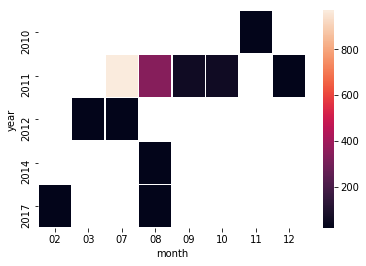

In [148]:
%matplotlib inline
import seaborn as sea
sea.heatmap(dataset_ym,linewidths=.5)

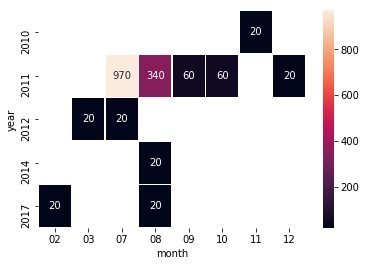

In [149]:
sea.heatmap(dataset_ym,annot=True,fmt="n",linewidths=.5)

In [151]:
title[2]

'真的猛士，敢于直面惨淡的人生，敢于正视推迟的档期。这是怎样的哀痛者和幸福者？然而上映又常常为庸人设计，以时间的流驶，来洗涤电影，仅使留下无谓的拖延和微末的悲哀。在这无谓的拖延和微末的悲哀中，又给某电影暂得票房，维持着这似人非人的影院。我不知道这样的影院何...                     '

In [155]:
T_3_comment['words'] = comment

In [156]:
T_3_comment['word_count'] = [i.count('评论') for i in T_3_comment['words']]

In [157]:
dataset_md_words=pd.pivot_table(T_3_comment, values = 'word_count', index = 'month', columns = 'day',aggfunc='sum')

In [158]:
dataset_md_words

day,01 10:49:31,01 11:38:43,01 15:28:03,01 16:22:30,01 19:37:00,01 23:13:37,02 00:52:53,02 21:20:10,02 21:38:15,03 00:36:30,...,28 08:46:20,28 14:52:53,28 23:50:51,29 01:54:25,29 17:35:05,30 12:16:45,30 16:44:14,31 04:28:43,31 22:17:23,31 23:16:10
month,,,,,,,,,,,,,,,,,,,,,
02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0.0,0.0,0.0,NaN,1.0,0.0,NaN,1.0,0.0,2.0
08,0.0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


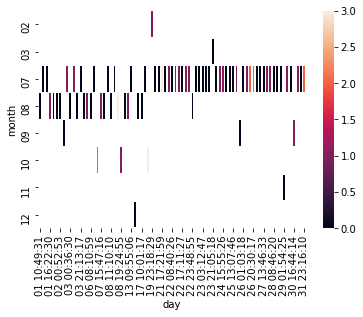

In [159]:
sea.heatmap(dataset_md_words,linewidths=.5)

In [160]:
from datetime import datetime

In [181]:
T_3_comment.评论时间[1]

'2011-07-08 02:11:09'

In [183]:
time = datetime.strptime(T_3_comment['评论时间'][0], '%Y-%m-%d %H:%M:%S')

In [185]:
print(time)

2011-07-08 02:11:09


In [192]:
T_3_comment['具体时间'] = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S') for i in T_3_comment['评论时间']]

In [188]:
T_3_comment.具体时间.head()

0   2011-07-08 02:11:09
1   2011-07-08 02:11:09
2   2011-07-08 02:11:09
3   2011-07-08 02:11:09
4   2011-07-08 02:11:09
Name: 具体时间, dtype: datetime64[ns]

In [193]:
T_3_comment.具体时间.value_counts()

2011-07-27 18:40:45    20
2011-08-01 10:49:31    20
2011-07-22 01:08:19    20
2011-08-11 11:02:06    20
2011-08-17 10:01:17    20
2011-07-26 23:45:30    20
2011-07-30 12:16:45    20
2011-08-09 23:57:11    20
2012-03-23 21:05:18    20
2011-07-20 09:19:52    20
2011-07-02 21:38:15    20
2011-07-26 20:30:17    20
2011-08-06 08:10:59    20
2011-07-28 23:50:51    20
2017-02-19 23:18:29    20
2011-08-01 23:13:37    20
2011-08-01 19:37:00    20
2011-08-03 18:04:38    20
2011-08-01 16:22:30    20
2011-07-08 02:11:09    20
2011-07-27 13:46:33    20
2011-08-04 17:53:03    20
2011-12-14 13:42:37    20
2011-07-26 10:03:28    20
2011-09-30 16:44:14    20
2011-07-21 09:12:09    20
2011-07-23 18:38:40    20
2011-07-29 17:35:05    20
2011-07-23 23:39:00    20
2011-07-22 17:11:27    20
                       ..
2011-08-14 18:30:19    20
2011-07-31 04:28:43    20
2011-07-31 22:17:23    20
2011-07-27 16:59:50    20
2011-08-03 00:36:30    20
2011-07-24 15:55:26    20
2011-10-06 19:54:57    20
2011-07-28 0

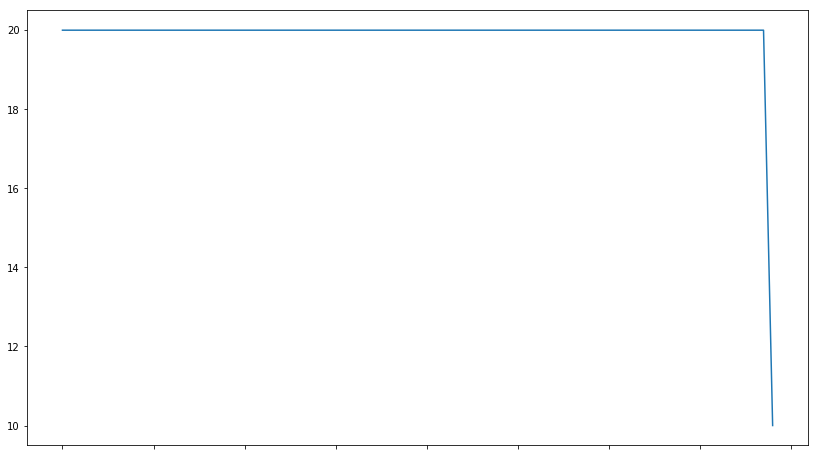

In [194]:
T_3_comment.评论时间.value_counts().plot(kind='line', rot=0, figsize=(14, 8))

In [197]:
group_word = T_3_comment.groupby(['评论时间'])['word_count'].sum()

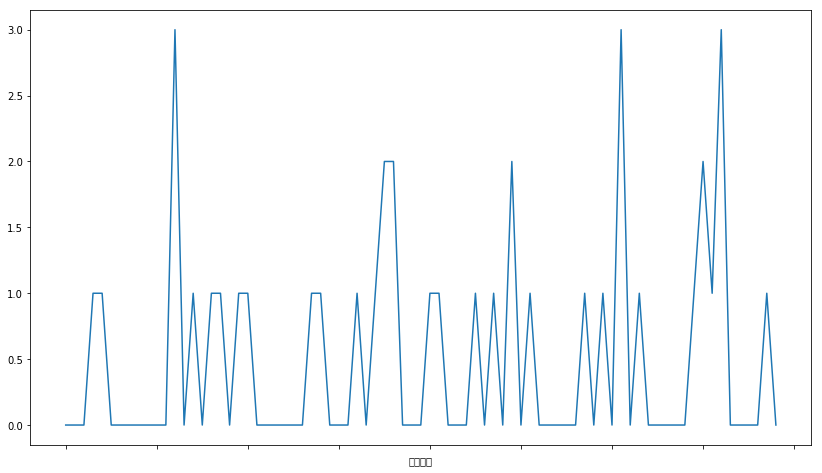

In [198]:
group_word.plot(kind='line',figsize=(14, 8))